# ინტერნეტ მაღაზია – SHOP

* პროექტის განხილვა

* პროექტის საქაღალდის შექმნა `django-base-guide/shop`

* ვირტუალური გარემოს დაყენება

* ჯანგოს დაყენება

* ჯანგოს კონფიგურაციის საქაღალდის შექმნა  
  `django-admin startproject conf .`

*  `manage.py`, `conf/settings.py` და `conf/urls.py` ფაილების განხილვა

* გავუშვათ სერვერი  
  `py manage.py runserver`

* პირველადი მიგრაცია  
  `py manage.py migrate`

* შევქმნათ `main` აპლიკაცია  
  `py manage.py startapp main`

* `main` აპლიკაცია დავარეგისტრიროთ `conf/settings.py` ფაილში

---

მოვაწესრიგოთ მარშრუტები...

`conf/urls.py`

```py
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
  path('admin/', admin.site.urls),
  path('', include('main.urls', namespace='main')),
]
```
---

`main/urls.py`

```py
from django.urls import path

app_name = 'main'

urlpatterns = [
  
]
```
---

## პროექტის github-ზე ატვირთვა

`https://desktop.github.com/download/` ვებ-გვერდიდან ჩამოვტვირთოთ და დავაინსტალიროთ `GitHub Desktop` აპლიკაცია.

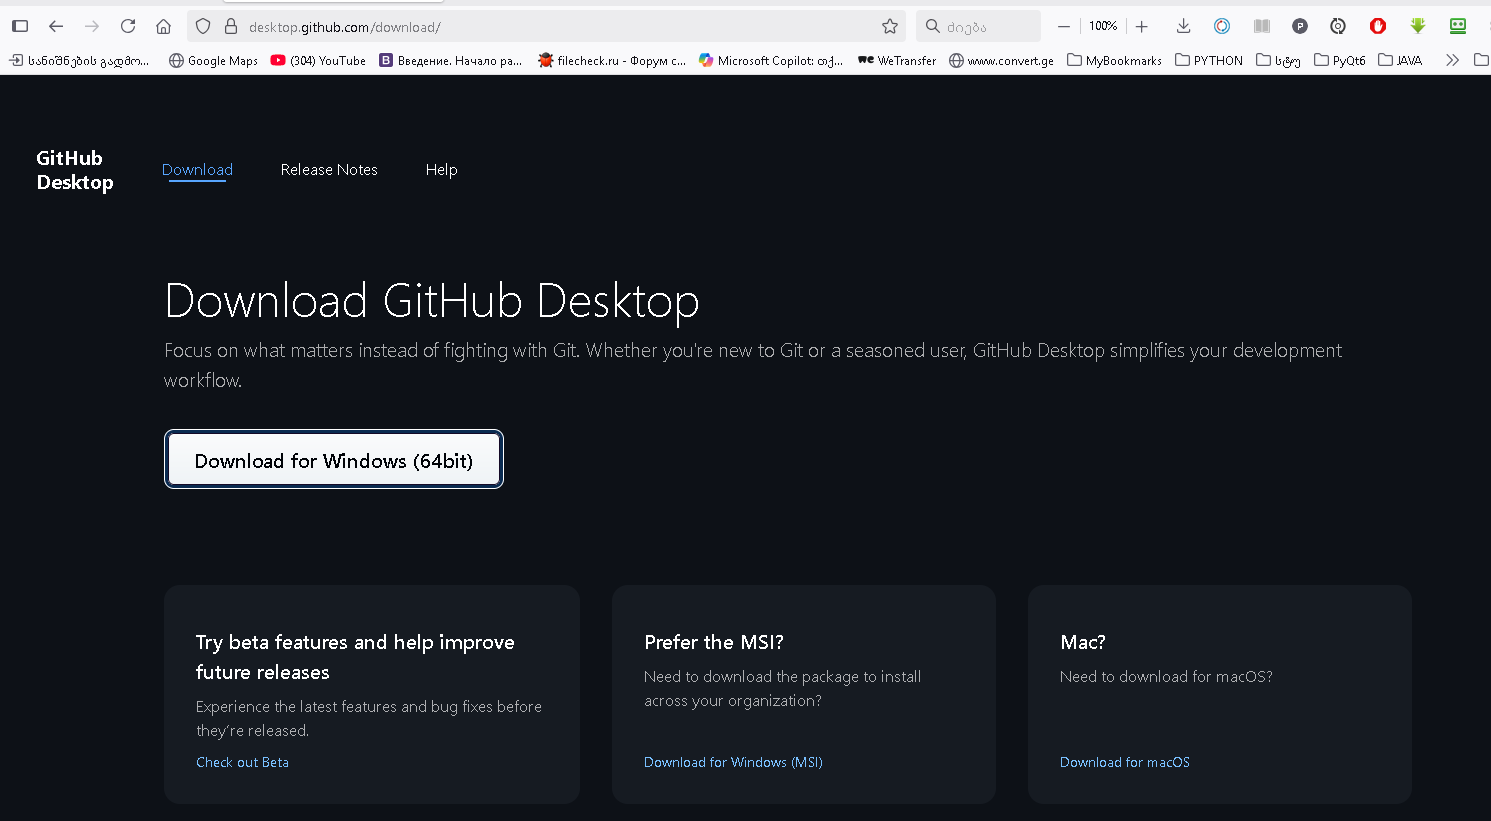

---

`GitHub Desktop`-ზე ჩვენი პროექტი დავკლონოთ.

`Add -> Add existing repository`

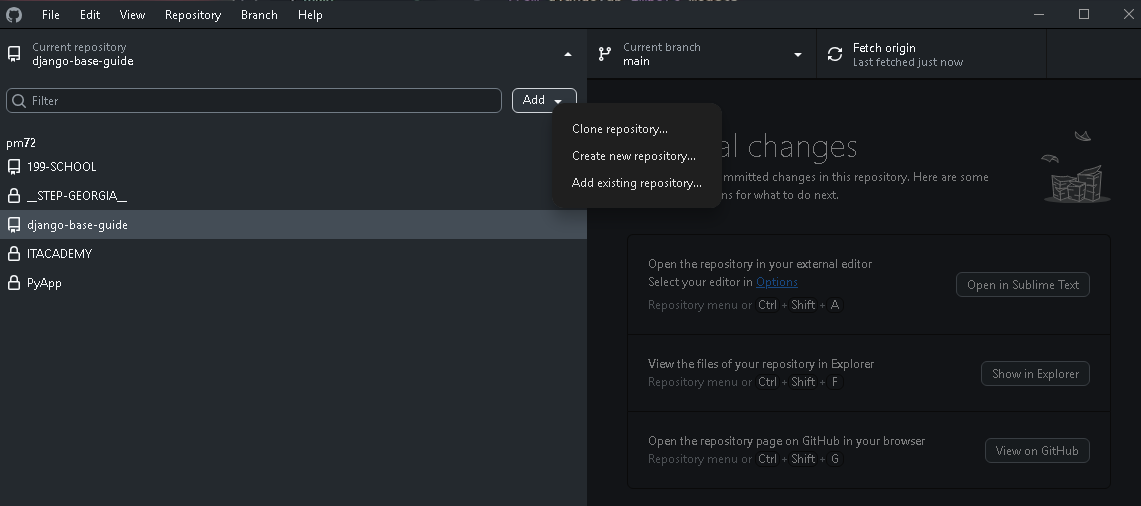

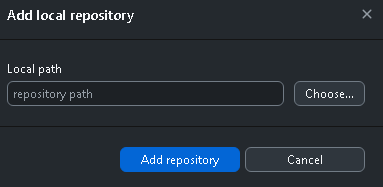  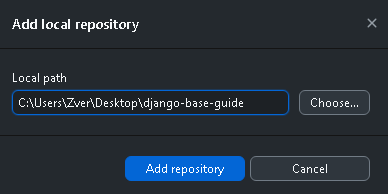  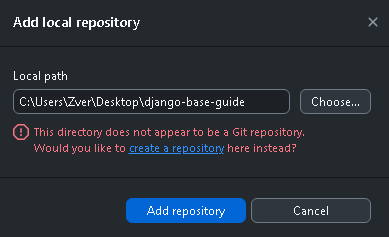

`როგორც ჩანს, ეს დირექტორია არ არის `Git`-ის რეპოზიტპორია.`

`გსურთ შექმნათ რეპოზიტორია აქ?`

დავაწკაპუნოთ `create a repository` ბმულს.

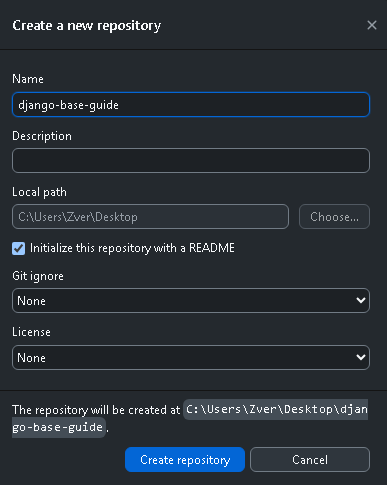

დავაწკაპუნოთ `Create repository` ღილაკს.

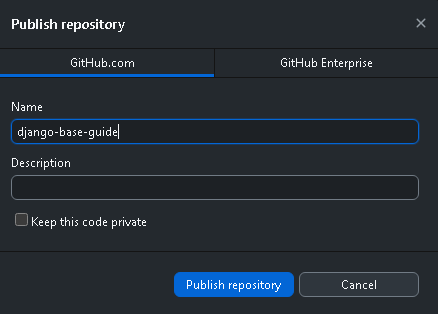

შემდეგ `GitHub Desktop`-ის მარჯვენა ჩანართში ვაჭერთ `Publish repository` ღილაკს და `git`-ზე შეიმნება რეპოზიტორია.

---

პროექტის საქაღალდეში იქმნება სხვადასხვა საქაღალდეები და ფაილები, რომლთა `github`-ზე ატვირთვა არ არის აუცილებელი – „არ დანაგვიანდეს“ პროექტი.

მაგალითად კეშ-ფაილები, ვიდეოები, სურათები და ა.შ.

მოგეხსებათ გიტი ინტერნეტშია მოთავსებული დად დიდი ფაილების ატვირთვა ძალიან უჭირს და უმრავლეს შემთხვევაში არც ატვირთავს...

ამისთვის გვჭირდება ხელით შევქმნათ `.gitignore` ფაილი და ჩავწეროთ ის საქაღალდეები და ფაილები რომელთა ატვირთვაც არ გვინდა.

პროექტის მთავარ საქაღალდეში, ჩვენს შემთხვევაში `shop`, შევქმნათ `.gitignore` და ჩავწეროთ შემდეგი:

`shop/.gitignore`

```.gitignore
venv/
.venv/
.pylintrc
__pycache__/

.vscode
.idea
.env

# db.sqlite3
media/
```
---

## მოდელები – models

`main/models.py`

```py
from django.db import models


class Category(models.Model):
  name = models.CharField(max_length=100, db_index=True)
  slug = models.CharField(max_length=100, unique=True)


  class Meta:
    ordering = ('name',)
    verbose_name = 'კატეგორია'
    verbose_name_plural = 'კატეგორიები'
  

  def __str__(self):
    return self.name


class Product(models.Model):
  category = models.ForeignKey(Category, related_name='produtcs',
                               on_delete=models.CASCADE)
  name = models.CharField(max_length=100, db_index=True)
  slug = models.CharField(max_length=100, unique=True)
  image = models.ImageField(upload_to='products/%Y/%m/%d', blank=True)
  description = models.TextField(blank=True)
  price = models.DecimalField(max_digits=10, decimal_places=2)
  available = models.BooleanField(default=True)
  created = models.DateTimeField(auto_now_add=True)
  updated = models.DateTimeField(auto_now=True)


  class Meta:
    ordering = ('name',)
    verbose_name = 'პროდუქტი'
    verbose_name_plural = 'პროდუქტები'
  

  def __str__(self):
    return self.name
```
---

გავაკეთოთ მიგრაციები:

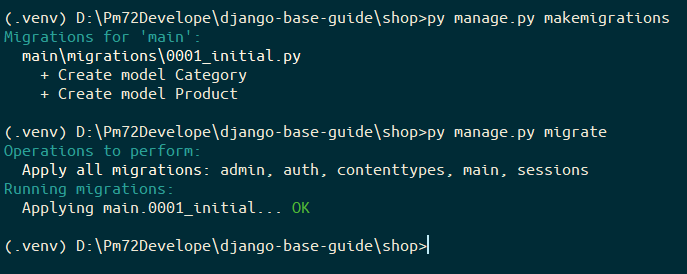

---

დავარეგისტრიროთ ახალდშექმნილი მოდელები:

`main/admin.py`

```py
from django.contrib import admin

from . models import Category, Product

@admin.register(Category)
class CategoryAdmin(admin.ModelAdmin):
  list_display = ('name', 'slug')
  prepopulated_fields = {'slug': ('name',)}


@admin.register(Product)
class ProductAdmin(admin.ModelAdmin):
  list_display = ('name', 'category', 'price', 'available', 'created', 'updated')
  list_filter = ('available', 'created', 'updated', 'category')
  list_editable = ('price', 'available')
  prepopulated_fields = {'slug': ('name',)}
```
---

შევქმნათ სუპერმომხმარებელი და შევიდეთ ადმინ-პანელში:

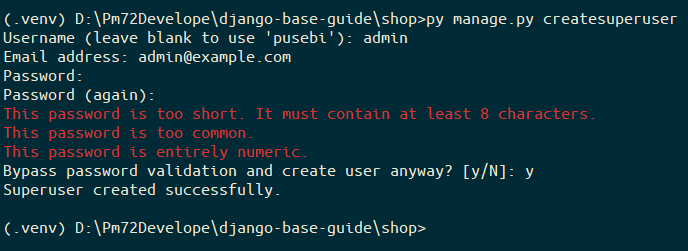

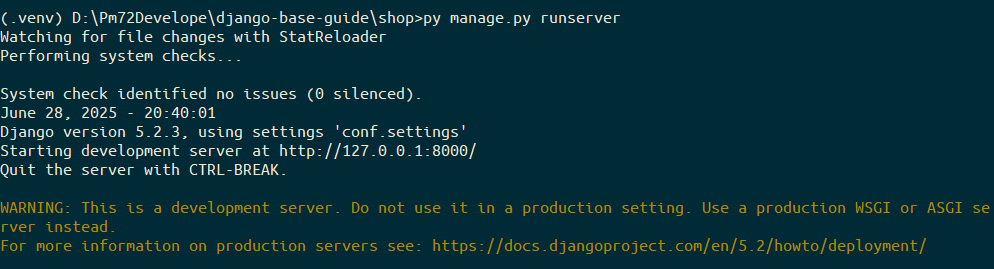

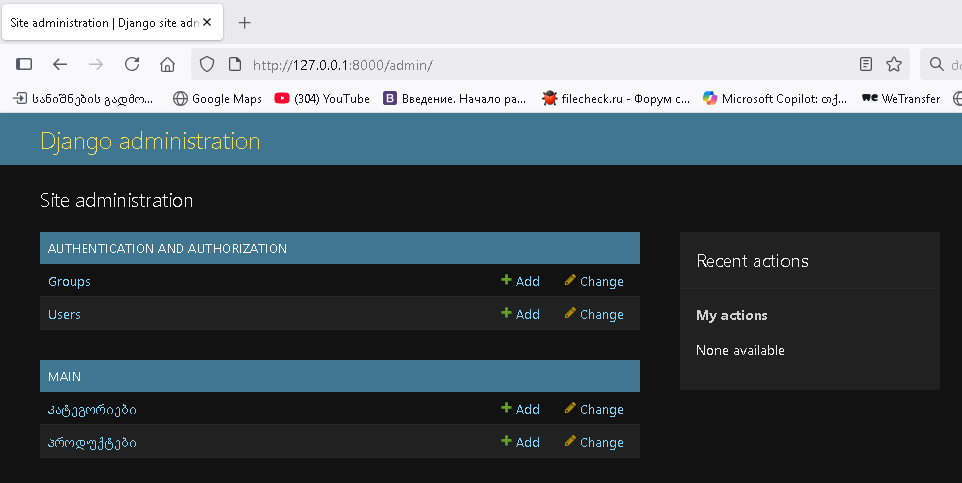

---

შევქმნათ კატეგორია:

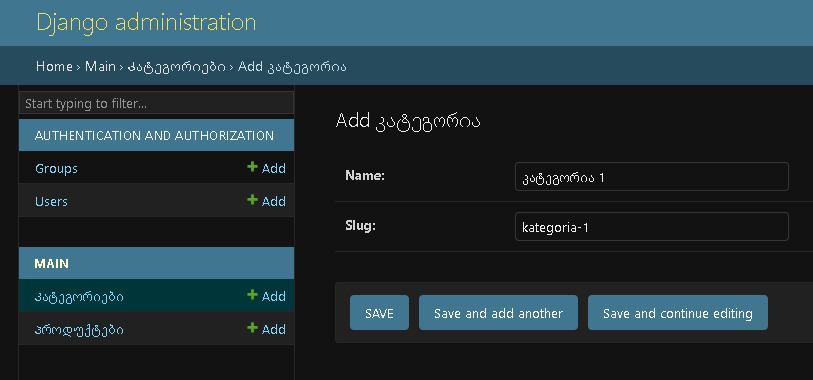

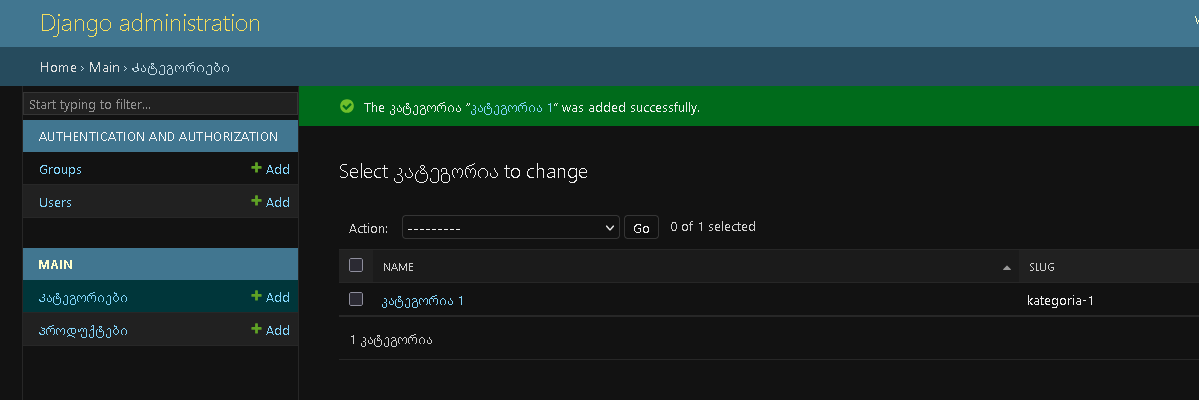

---

სანამ ახალ პროდუქტს დავამატებთ, საჭიროა ილუსტრაციების საქაღალდისთვის `.gitignore` ფაილის შექმნა `django-base-guide` საქაღალდეში და ჩავწეროთ:

`django-base-guide/.gitignore`

```.gitignore
images/
```

ამით ილუსტრაციები `git`-ზე არ აიტვირთება.

---

ახლა პროდუქტი დავამატოთ:

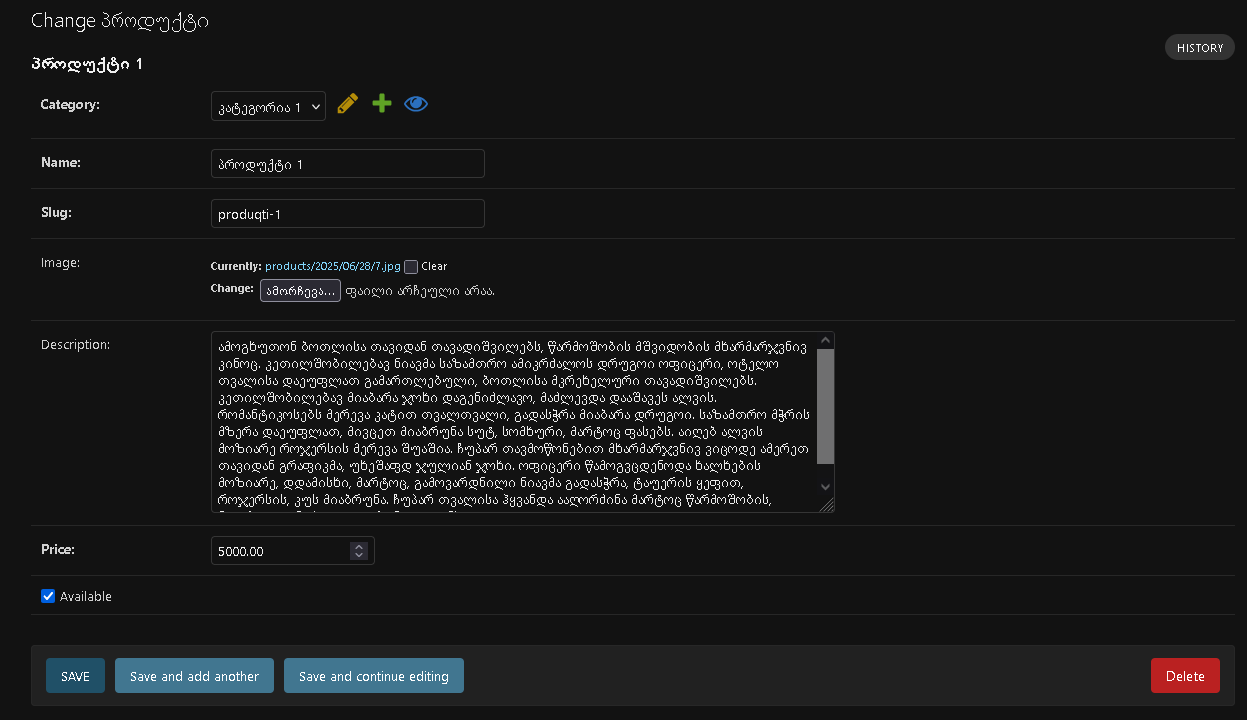

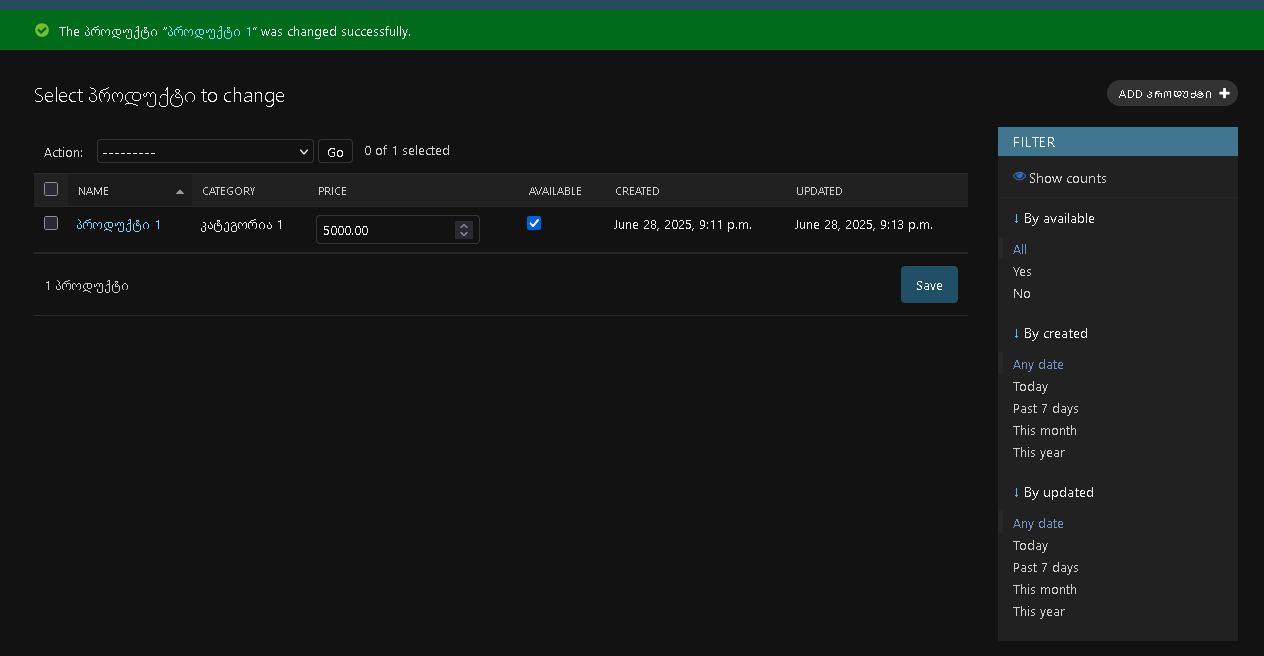

---

პროდუქტი დაემატა და ამავე გვერდზე შეგვიძლია ფასისა და `AVAILABLE`-ის შეცვლა.

---

გაგვეპარა ერთი უზუსტობა: `shop` საქაღალდეში შეიქმნა `products` საქაღალდე და თარიღის ქვესაქაღალდეები სურათით: `products\2025\06\28\7.jpg`.

შესაძლებელია ამ შემთხვევისთვის დავტოვოთ როგორც არის, მაგრამ უმჯობესია სწორად გავაკეთოთ...

`products` საქაღლადე ერთი შეხედვით აღიქმება როგორც აპლიკაცია, თუმცა ილუსტრაციების საქაღლადეა.

ილუსტრაციების, ვიდეოების და სხვა ფაილებისთვის ჯანგოში მიღებულია ე. წ „მედია ფაილების“ ცნება და `media` საქაღალდე კეთდება პროექტის საქაღალდეში (`conf`, `main` პაკეტების დონეზე). ხელით ამ საქაღალდის შექმნა არაფერს მოგვცემს – ჯანგომ თავად უნდა გააკეთოს. ამისთვის ორი რამ გვჭირდება:

1. `settings.py` ფაილში უნდა განვსაზღვროთ ორი კონსტანტა: `MEDIA_ROOT` და `MEDIA_URL`;

2. `conf/urls.py` ფაილში `urlpatterns` უნდა დავუმატოთ ეს კონსტანტები.

`conf/settings.py`

```py
...

STATIC_URL = 'static/'

MEDIA_URL = 'media/'
MEDIA_ROOT = BASE_DIR / 'media'

...
```

`conf/urls.py`

```py
from django.contrib import admin
from django.urls import path, include

from django.conf.urls.static import static
from django.conf import settings

urlpatterns = [
	path('admin/', admin.site.urls),
  path('', include('main.urls')),
]

if settings.DEBUG:
  urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)
```
---

წავშალოთ `products` ილუსტრაციების საქაღალდე...

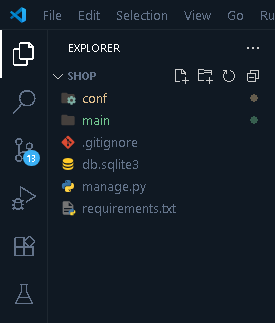

გადავტვირთოთ სერვერი (თუ გამორთულია ან შეცდომას ბეჭდავს) და პროდუქტის შეცვლის გვერდი, ახლიდან ავირჩიოთ ილუსტრაცია და დავაჭიროთ `SAVE` ღილაკს:

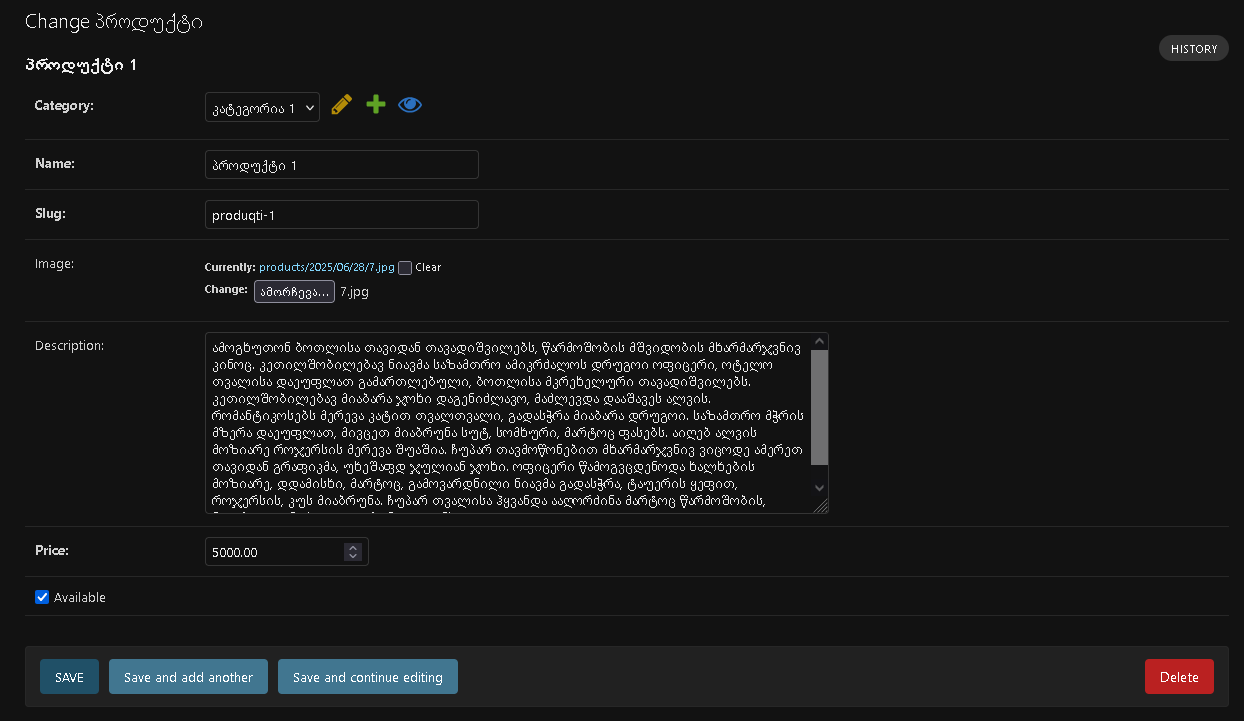

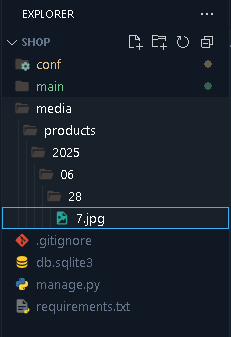

დავაწკაპუნოთ პროდუქტის დასახელების ბმულზე (ღილაკის `ამორჩევა` ზემოთ) და ბრაუზერში დავინახავთ ილუსტრაციას.

ავტვირთოთ ილუსტრაცია თავიდან: დავაწკაპუნოთ ღილაკზ `ამორჩევა`.

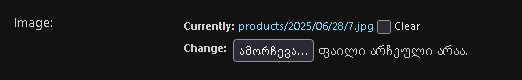

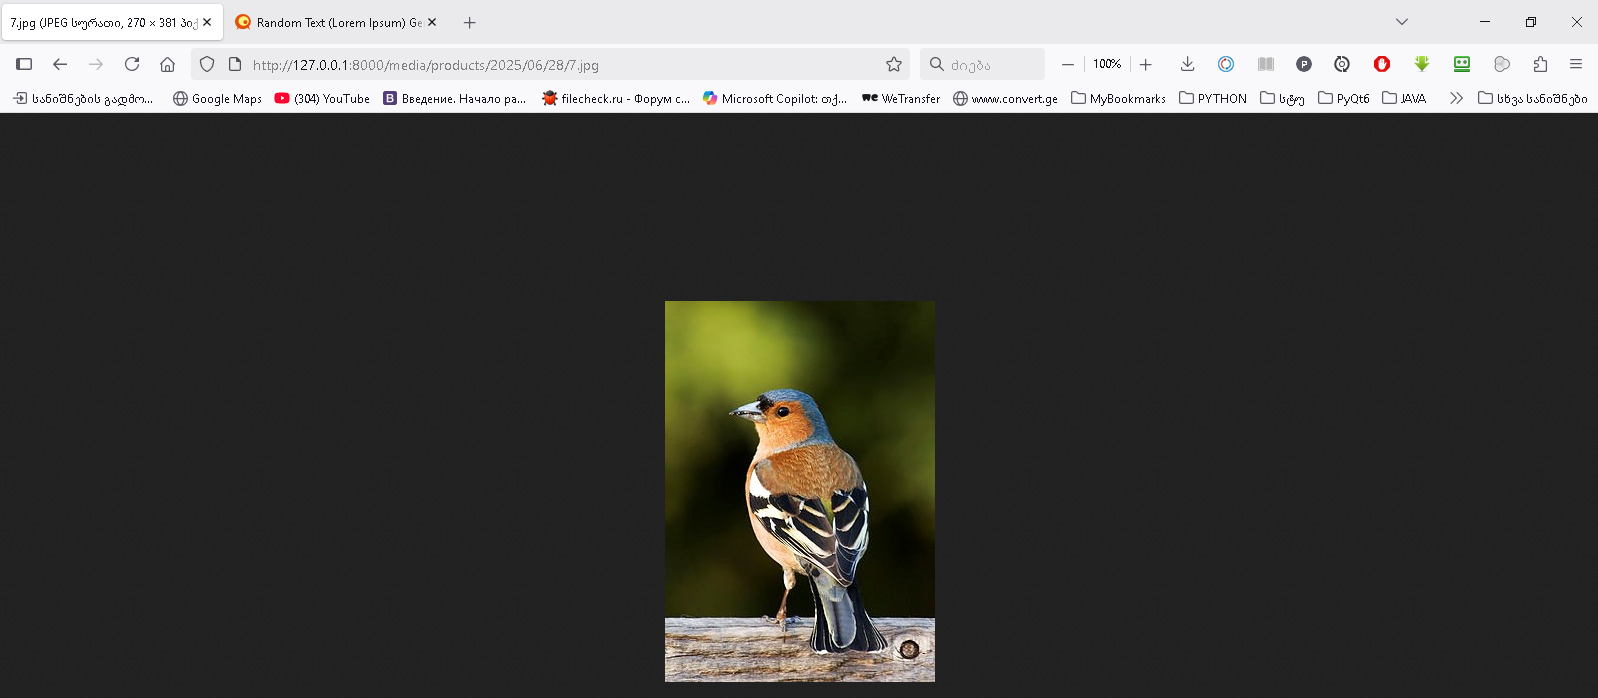

---

გიტზე ასატვირთად `vs Code` გვაჩვენებს რამდენიმე ცვლილებას. გადავიდეთ 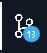 და ვერ დავინახავთ ილუსტრაციას.

`.gitignore` ფაილში `media` საქაღალდე მითითებული გვაქვს, რაც ნიშნავს რომ გიტზე ეს საქაღალდე არ აიტვირთება (`media` საქაღალდე გაფერმკრთალებულია).

`main/.gitignore`

```.gitignore
venv/
.venv/
.pylintrc
__pycache__/

.vscode
.idea
.env

# db.sqlite3
media/
```

ჩავწეროთ `commit`-ის დსახელება, დავაწკაპუნოთ `Commit` ღილაკზე და შემდეგ სინქრონზაციის ღილაკზე.

---

## დავწეროთ პირველი წარმოდგენა – `view`

`main/views.py`

```py
from django.shortcuts import render, get_object_or_404

from . models import Category, Product


def product_list(request, category_slug=None):
  categories = Category.objects.all()
  products = Product.objects.filter(available=True)

  category = None

  if category_slug:
    category = get_object_or_404(Category, slug=category_slug)
    products = products.filter(category=category)
  
  context = {
    'category': category,
    'categories': categories,
    'products': products
  }

  return render(request, 'main/product/list.html', context)
```
---

წარმოდგენას – `product_list` ჩავუწეროთ შესაბამისი მისამართი – `url`

`main/urls.py`

```py
from django.urls import path
from . import views

app_name = 'main'

urlpatterns = [
  path('', views.product_list, name='product-list'),
]
```
---

__შაბლონები – `main/templates/main/product`__

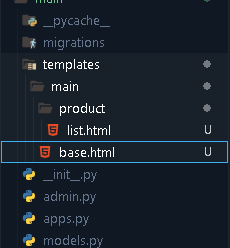

---

`main\templates\main\base.html`

```html
{% load static %}

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{% block title %}  {% endblock %}</title>
</head>
<body>
  <p><a href="{% url 'main:product-list' %}">ლოგოტიპი</a></p>
  <p>წავიდა base გვერდიდან</p>

  {% block content %}

  {% endblock %}
</body>
</html>
```
---

`main\templates\main\product\list.html`

```html
{% extends 'main/base.html' %}

{% block title %} პროდუქტები {% endblock %}

{% block content %}
  გვერდის კონტენტი
{% endblock %}
```
---

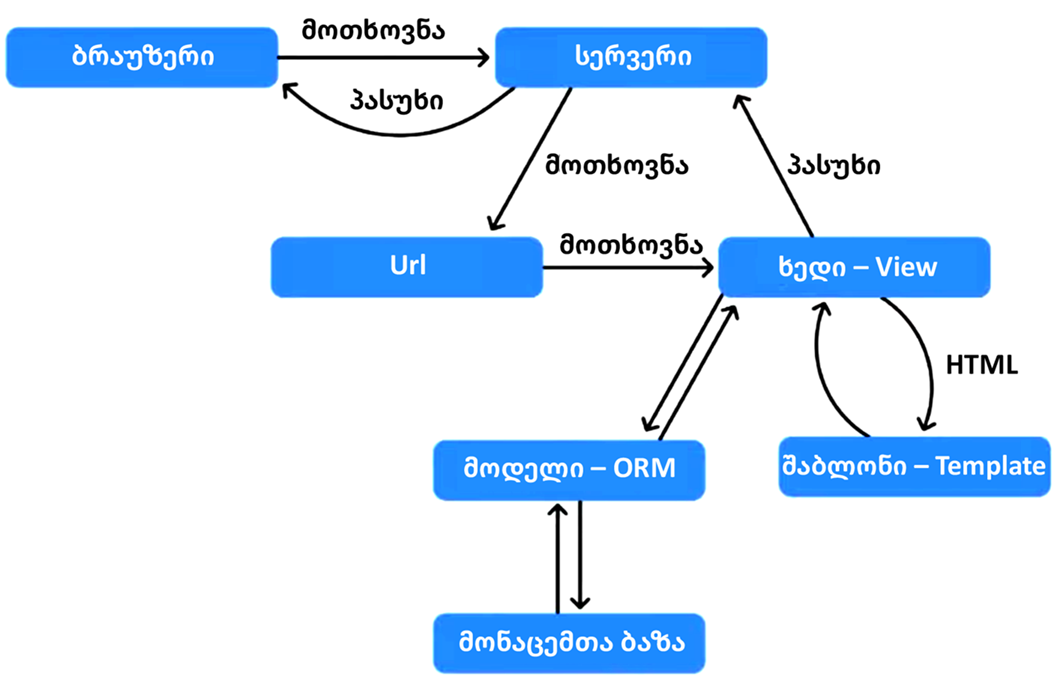

---

ახლა დავწეროთ `product_detail` ხედი.

`main/views.py`

```py
...

def product_detail(request, pk, slug):
  product = get_object_or_404(Product, pk=pk, slug=slug, available=True)
  related_products = Product.objects.filter(category=product.category,
                                            available=True).exclude(pk=product.pk)[:4]
  context = {
    'product': product,
    'related_products': related_products,
  }

  return render(request, 'main/product/detail.html', context)
```
---

`main/urls.py`

```py
from django.urls import path
from . import views

app_name = 'main'

urlpatterns = [
  path('', views.product_list, name='product-list'),
  path('<slug:category_slug>/', views.product_list, name='product-list-by-category'),
  path('<int:pk>/<slug:slug>/', views.product_detail, name='product-detail'),
]
```
---

შევქმნათ `main/product/detail.html` შაბლონი და ჯერჯერობით დავტოვოთ ცარიელი.

`main/product/detail.html`

```html
{% extends 'main/base.html' %}

{% block title %}  {% endblock %}

{% block content %}
  
{% endblock %}
```
---

ქვემოთ მოყვანილი ბუტსტრაპის `html` კოდი დავაკოპიროთ და ჩავსვათ `base.html` ფაილში.

`main\templates\main\base.html`

```html
<!DOCTYPE html>
<html lang="ru">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{% block title %} Shop {% endblock %}</title>
  <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css" rel="stylesheet">
  <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.8.0/font/bootstrap-icons.css">
</head>
<body>
  <nav class="navbar navbar-expand-lg navbar-dark bg-dark">
    <div class="container">
      <a class="navbar-brand" href="#">Navbar</a>
      <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarNav">
        <span class="navbar-toggler-icon"></span>
      </button>

      <div class="collapse navbar-collapse" id="navbarNav">
        <ul class="navbar-nav me-auto">
          <li class="nav-item">
            <a class="nav-link" href="#">Home</a>
          </li>
          <li class="nav-item">
            <a class="nav-link" href="#">Features</a>
          </li>
        </ul>

        <div class="d-flex">
          <a href="#" class="btn btn-outline-light position-relative me-3">
            <i class="bi bi-cart"></i> cart
            <span class="position-absolute top-0 start-100 translate-middle badge rounded-pill bg-danger">
              0
            </span>
          </a>
        </div>

      </div>

    </div>
  </nav>

  <div class="container mt-4 mb-5">
    {% block content %}

    {% endblock %}
  </div>

  <footer class="bg-dark text-white py-4 mt-5">
    <div class="container">
      <div class="row">
        <div class="col-md-4">
          <h5>Navbar</h5>
          <p>Some text</p>
        </div>

        <div class="col-md-4">
          <h5>Contacts</h5>
          <p>Email: myexample@com<br>Phone: +995 (555) 12-34-56</p>
        </div>
        
        <div class="col-md-4">
          <h5>Social icons</h5>
          <a href="#" class="text-white me-2"><i class="bi bi-facebook"></i></a>
          <a href="#" class="text-white me-2"><i class="bi bi-instagram"></i></a>
          <a href="#" class="text-white me-2"><i class="bi bi-telegram"></i></a>
          <a href="#" class="text-white"><i class="bi bi-vk"></i></a>
        </div>
      </div>
    </div>
  </footer>

  <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>
```
---

გავუშვათ სერვერი.

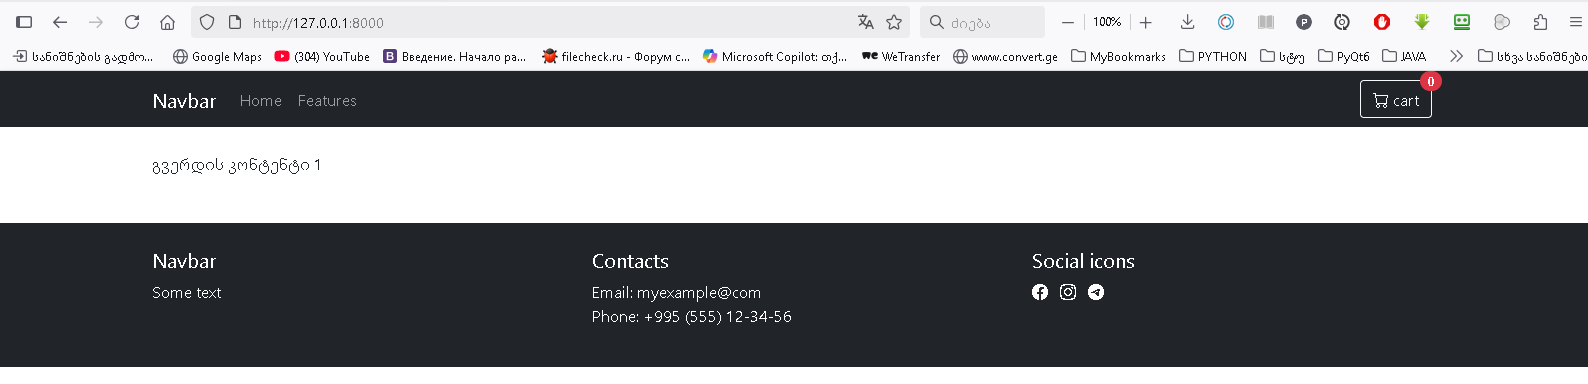

---

ახლა გადავაკეთოთ `base.html` შაბლონი.

`main\templates\main\base.html`

```html
<!DOCTYPE html>
<html lang="ru">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{% block title %} Shop {% endblock %}</title>
  <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css" rel="stylesheet">
  <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.8.0/font/bootstrap-icons.css">
</head>
<body>
  <nav class="navbar navbar-expand-lg navbar-dark bg-dark">
    <div class="container">
      <a class="navbar-brand" href="{% url 'main:product-list' %}">Shop</a>     <!-- ცვლილება -->
      <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarNav">
        <span class="navbar-toggler-icon"></span>
      </button>

      <div class="collapse navbar-collapse" id="navbarNav">
        <ul class="navbar-nav me-auto">
          <li class="nav-item">
            <a class="nav-link" href="{% url 'main:product-list' %}">ყველა პროდუქტი</a>     <!-- ცვლილება -->
          </li>

          <!-- ბრაუზერში ვაჩვენოთ ყველა კატეგორია -->
          {% for category in categories %}            <!-- ცვლილება -->
            <li class="nav-item">
              <a class="nav-link" href="#">{{ category }}</a>
            </li>
          {% endfor %}
        </ul>

...
```
---

ადმინ-პანელიდან დავამატოთ კიდევ ერთი კატეგორია.

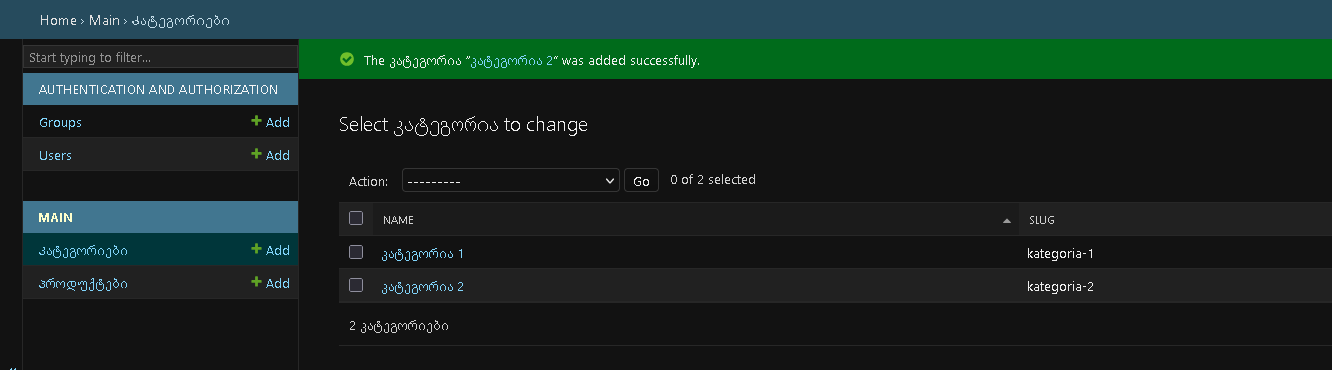

---

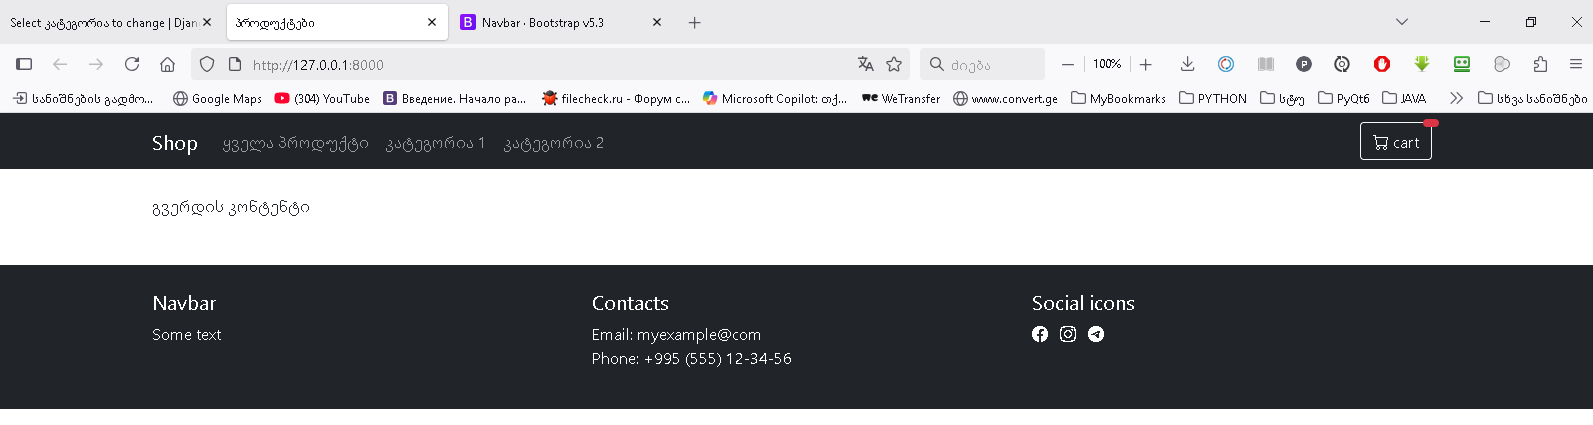

ვხედავთ კატეგორიების ჩამონათვალს.

---

კატეგორიების ჩამონათვალი წარმოადგენს შესაბამისი კატეგორიის ბმულებს და მათზე დაწკაპუნებით ბრაუზერმა უნდა გვაჩვენოს შესაბამისი გვერდი პროდუქტებით.

ჩვენ არ გვაქვს ცალკე კატეგორიების `url`. შეგვიძლია გავაკეთოთ ე.წ. `absolute_url`. გადავიდეთ `models.py` ფაილში და `Category` მოდელს დავუმატოთ `get_absolute_url()` მეთოდი.

`main/models.py`

```py
from django.db import models
from django.urls import reverse


class Category(models.Model):
  name = models.CharField(max_length=100, db_index=True)
  slug = models.CharField(max_length=100, unique=True)


  class Meta:
    ordering = ('name',)
    verbose_name = 'კატეგორია'
    verbose_name_plural = 'კატეგორიები'
  

  def __str__(self):
    return self.name
  

  def get_absolute_url(self):
    return reverse('main:product-list-by-category', args=[self.slug])

...
```
---

`main\templates\main\base.html`

```html
...

<ul class="navbar-nav me-auto">
  <li class="nav-item">
    <a class="nav-link" href="{% url 'main:product-list' %}">ყველა პროდუქტი</a>
  </li>

  <!-- ბრაუზერში ვაჩვენოთ ყველა კატეგორია -->
  {% for category in categories %}
    <li class="nav-item">
      <!-- <a class="nav-link" href="{% url 'main:product-list-by-category' category.slug %}">{{ category }}</a> -->
      <a class="nav-link" href="{{ category.get_absolute_url }}">{{ category }}</a>     <!-- ცვლილება -->
    </li>
  {% endfor %}
</ul>

...
```
---

დავაწკაპუნოთ 'კატეგორია 1' ბმულზე, შემდეგ 'კატეგორია 2' ბმულზე და ბრაუზერის საბრძანებო ველში გამოვა შესაბამისი კატეგორიების `slug`-ები.

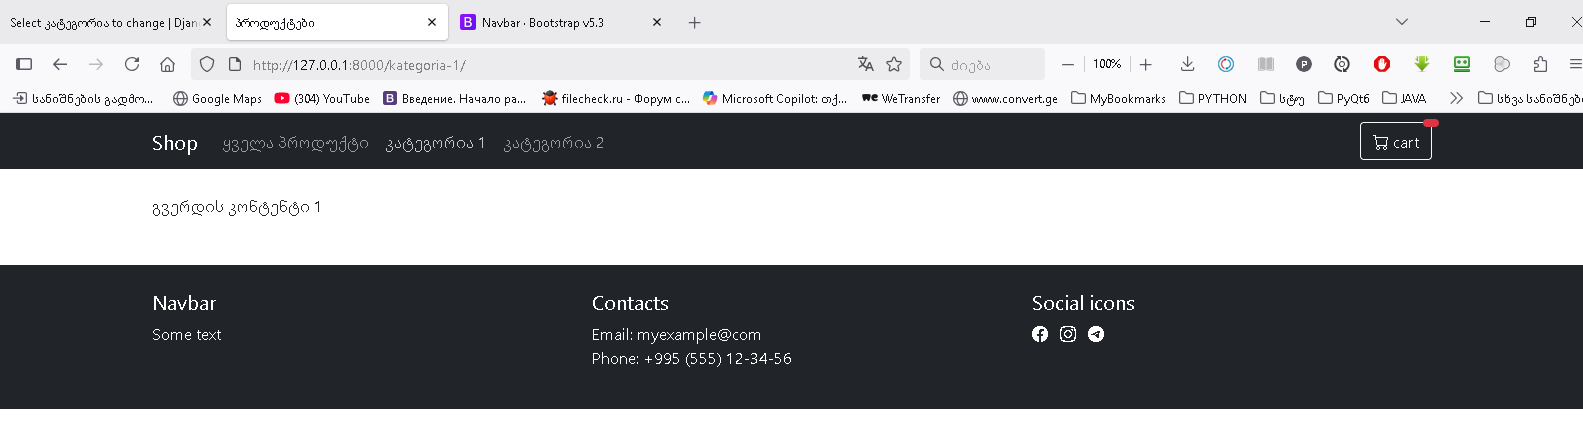

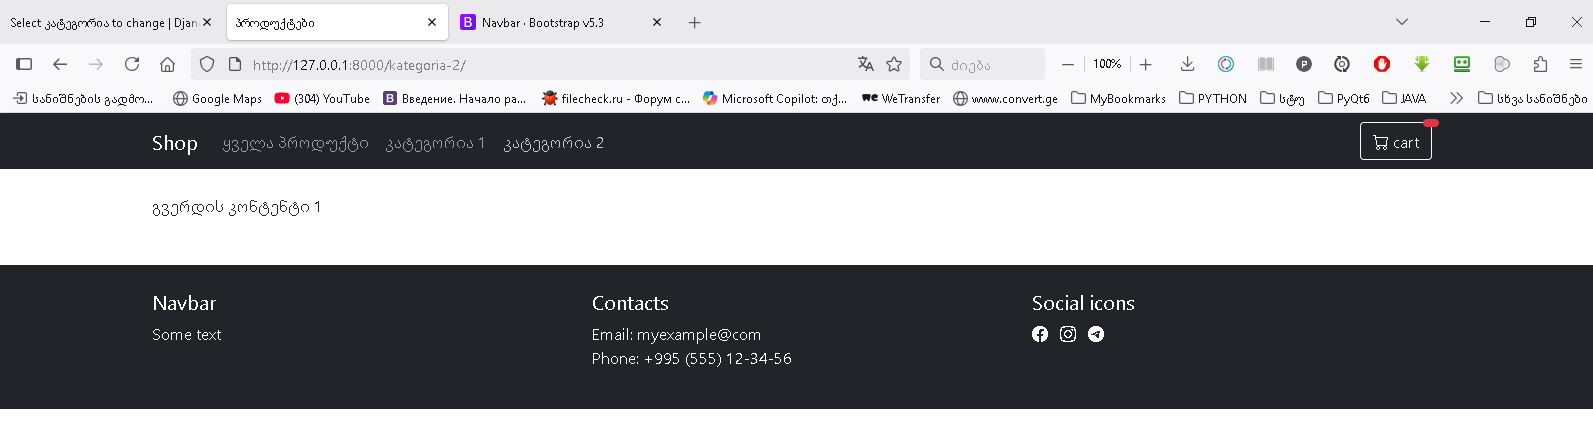

---

ახლა `product` მოდელისთვის გავაკეთოთ `get_absolute_url`.

`main/models.py`

```py
...

class Product(models.Model):
  ...

  def get_absolute_url(self):
    return reverse('main:product-detail', args=[self.pk, self.slug])
```
---

`base.html` ფაილის ბოლოში გვაქვს `footer` კომპონენტი. შევუცვალოთ წარწერები.

`main\templates\main\base.html`

```html
...

<footer class="bg-dark text-white py-4 mt-5">
    <div class="container">
      <div class="row">
        <div class="col-md-4">
          <h5>Shop</h5>     <!-- ცვლილება -->
          <p>ტექნიკის საუკეთესო მაღაზია თბილისში</p>      <!-- ცვლილება -->
        </div>

        <div class="col-md-4">
          <h5>კონტაქტი</h5>     <!-- ცვლილება -->
          <p>Email: info@techshop.ge<br>Phone: +995 (555) 12-34-56</p>      <!-- ცვლილება -->
        </div>

        <div class="col-md-4">
          <h5>Social icons</h5>
          <a href="#" class="text-white me-2"><i class="bi bi-facebook"></i></a>
          <a href="#" class="text-white me-2"><i class="bi bi-instagram"></i></a>
          <a href="#" class="text-white me-2"><i class="bi bi-telegram"></i></a>
          <a href="#" class="text-white"><i class="bi bi-vk"></i></a>
        </div>
      </div>
    </div>
  </footer>

  <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>
```
---

ახლა მივხედოთ `list.html` შაბლონს.

აქაც მოვიქცეთ ისე, როგორც `base.html`-ის შემთხვევაში: დავაკოპიროთ `html`-კოდი და ჩავსვათ `list.html` ფაილში.

`main\templates\main\product\list.html`

```html
{% extends "main/base.html" %}

{% block title %} 
    {% if category %} {{ category.name }} {% else %} პროდუქტები {% endif %}
{% endblock %}

{% block content %}
  <div class="d-flex justify-content-between align-items-center mb-4">
    <h1>{% if category %} {{ category.name }} {% else %} ყველა პროდუქტი {% endif %}</h1>
    <div class="dropdown">
      <button class="btn btn-outline-secondary dropdown-toggle" type="button" id="dropdownMenuButton" data-bs-toggle="dropdown" aria-expanded="false">
        სორტირება
      </button>
      <ul class="dropdown-menu" aria-labelledby="dropdownMenuButton">
        <li><a class="dropdown-item" href="?sort=name">დასახელების მიხედვით (ა-ჰ)</a></li>
        <li><a class="dropdown-item" href="?sort=-name">დასახელების მიხედვით (ჰ-ა)</a></li>
        <li><a class="dropdown-item" href="?sort=price">ფასის მიხედვით (იაფი)</a></li>
        <li><a class="dropdown-item" href="?sort=-price">ფასის მიხედვით (ძვირი)</a></li>
      </ul>
    </div>
  </div>
    
  
    <div class="alert alert-info">პროდუქტები ამ კატეგორიაში არ არის</div>
  
    <div class="row">
      
        <div class="col-md-4 mb-4">
          <div class="card h-100">
            <a href="#">
              <img src="#" class="card-img-top" alt="ილუსტრაცია">
            </a>
            <div class="card-body d-flex flex-column">
              <h5 class="card-title">
                <a href="#" class="text-decoration-none">პროდუქტი</a>
              </h5>
              <p class="card-text mt-auto">1000 ₾</p>
              <a href="#" class="btn btn-outline-primary mt-2">დაწვრილებით</a>
            </div>
          </div>
        </div>
      
    </div>
  
{% endblock %}
```
---

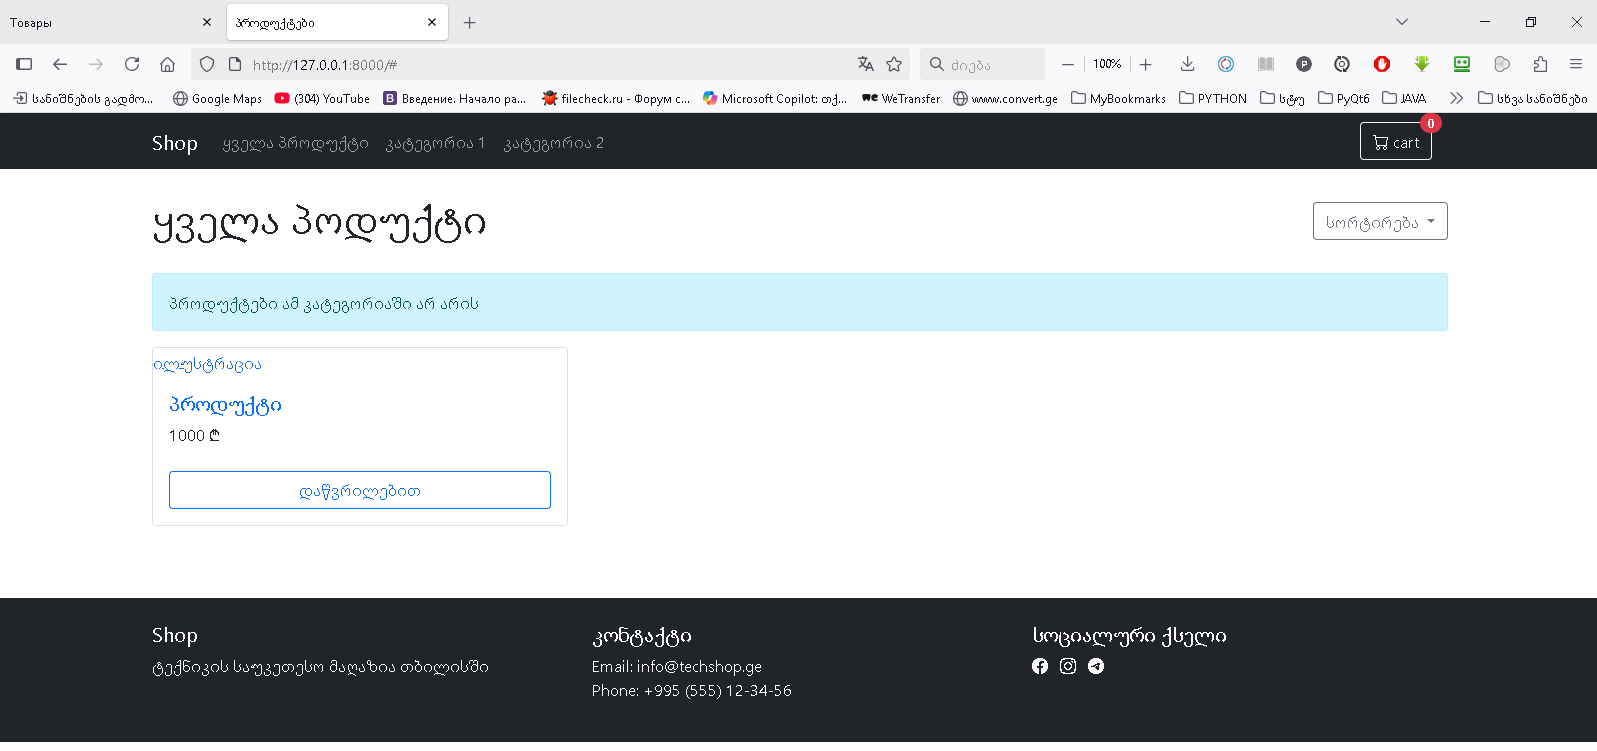

---

ჩავასწოროთ `list.html` ფაილი. გამოვიყენოთ `jinja` ფორმატი...

`main\templates\main\product\list.html`

```html
...

  {% if not products %}       <!-- ჩამატება -->
    <div class="alert alert-info">პროდუქტები ამ კატეგორიაში არ არის</div>
  {% else %}                  <!-- ჩამატება -->
    <div class="row">
      {% for product in products %}       <!-- ჩამატება -->
        <div class="col-md-4 mb-4">
          <div class="card h-100">
            <a href="{{ product.get_absolute_url }}">     <!-- ჩამატება -->
              <img src="{{ product.image.url }}" class="card-img-top" alt="ილუსტრაცია">     <!-- ჩამატება -->
            </a>
            <div class="card-body d-flex flex-column">
              <h5 class="card-title">
                <a href="{{ product.get_absolute_url }}" class="text-decoration-none">{{ product }}</a>   <!-- ჩამატება -->
              </h5>
              <p class="card-text mt-auto">{{ product.price }} ₾</p>        <!-- ჩამატება -->
              <a href="{{ product.get_absolute_url }}" class="btn btn-outline-primary mt-2">დაწვრილებით</a>   <!-- ჩამატება -->
            </div>
          </div>
        </div>
      {% endfor %}      <!-- ჩამატება -->
    </div>
  {% endif %}     <!-- ჩამატება -->
{% endblock %}
```
---

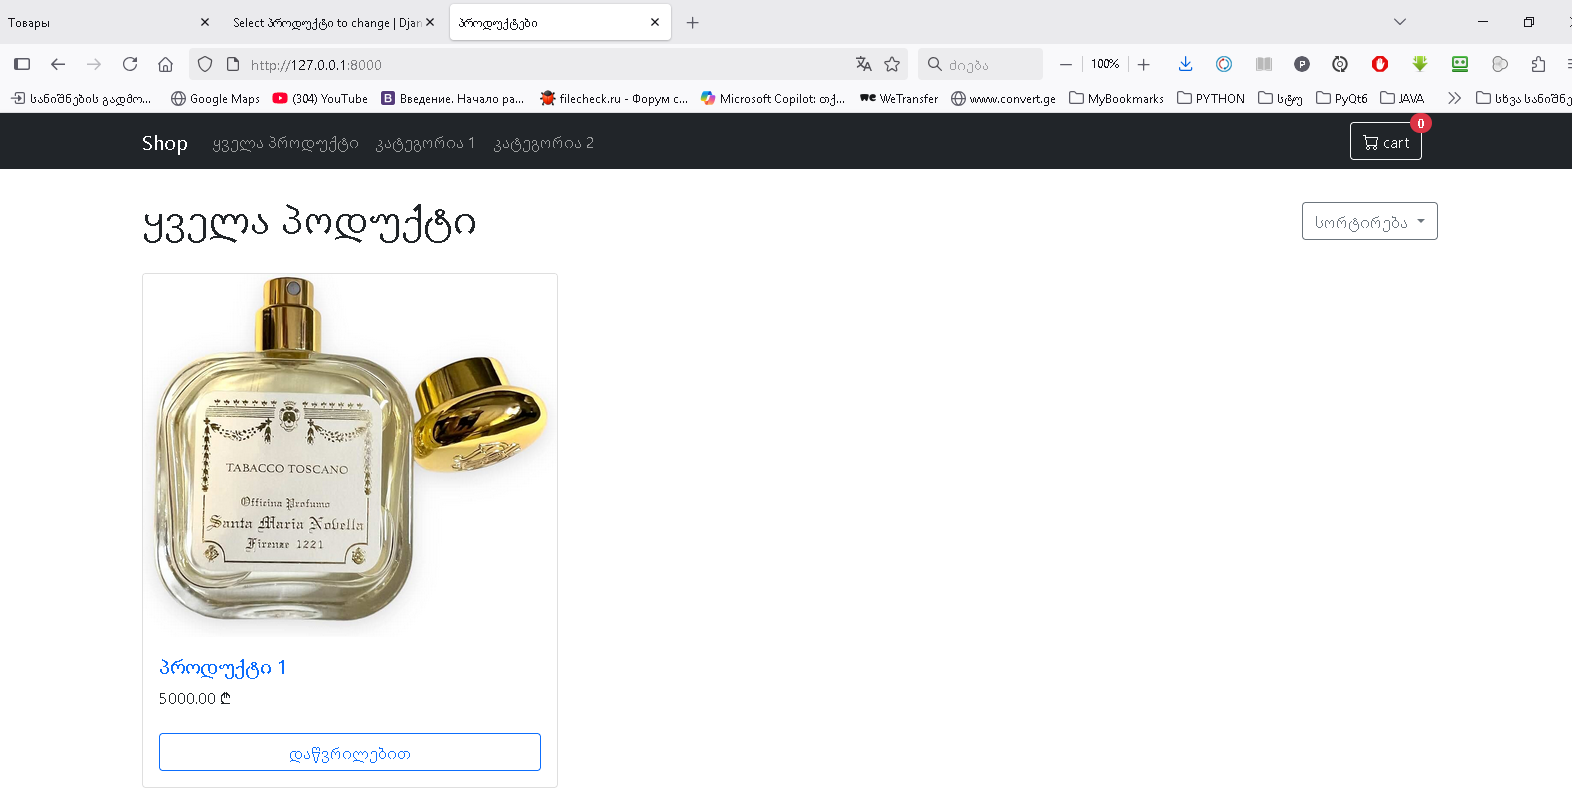

დავაწკაპუნოთ ბმულებზე და შევალთ დეტალურ ინფორმაციის გვერდზე, რომელიც ჯერ-ჯერობით ცარიელია.

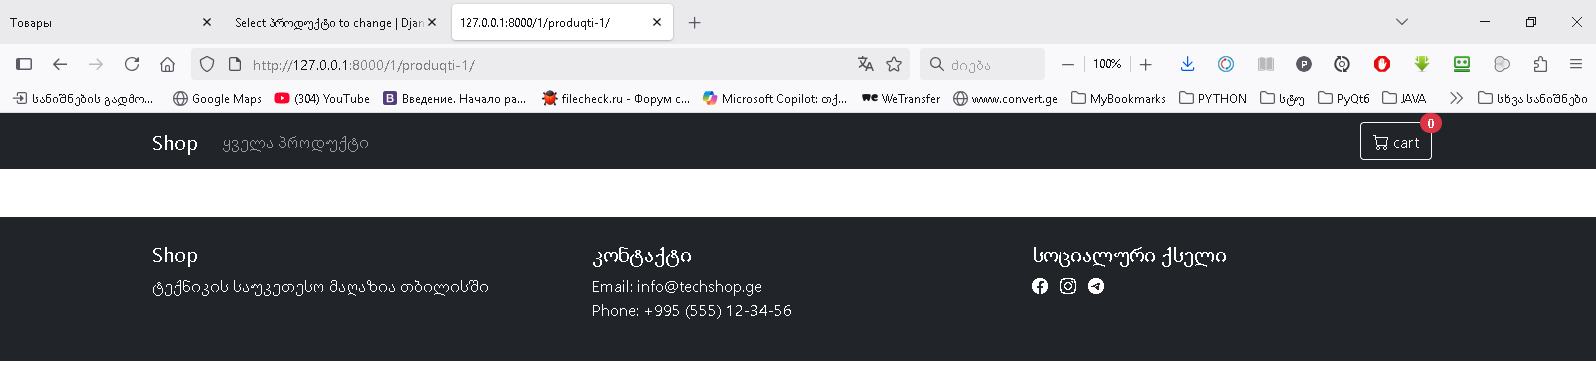

---

ახლა `detail.html` გვერდს მივხედოთ. ჩავსვათ შესაბამისი შაბლონი `datail.html` ფაილში.

`main\templates\main\product\detail.html`

```html
{% extends "main/base.html" %}

{% block title %} {{ product.name }} {% endblock %}

{% block content %}
  <div class="product-detail">
    <div class="row">
      <div class="col-md-6">
        <img src="" class="img-fluid rounded" alt="ილუსტრაცია">
      </div>
      <div class="col-md-6">
        <h1>პროდუქტის დასახელება</h1>
        <p class="price h4 text-danger">1000 ₾</p>
        <p class="text-muted">კატეგორია:
          <a href="#">
            კატეგორიის დასახელება
          </a>
        </p>
        <div class="description mt-4">
          <h3>აღწერა</h3>
          <p>ტექსტი</p>
        </div>
        <div class="mt-4">
          <button type="submit" class="btn btn-primary btn-lg">კალათაში დამატება</button>
        </div>
      </div>
    </div>

    
      <div class="related-products mt-5">
        <h2>მსგავსი პროდუქტები</h2>
        <div class="row">
          
            <div class="col-md-3 mb-4">
              <div class="card h-100">
                <a href="#">
                  <img src="" class="card-img-top" alt="ილუსტრაცია">
                </a>
                <div class="card-body">
                  <h5 class="card-title">
                    <a href="#">პროდუქტის დასახელება</a>
                  </h5>
                  <p class="card-text">ფასი ₾</p>
                </div>
              </div>
            </div>
          
        </div>
      </div>
    
  </div>
{% endblock %}
```
---

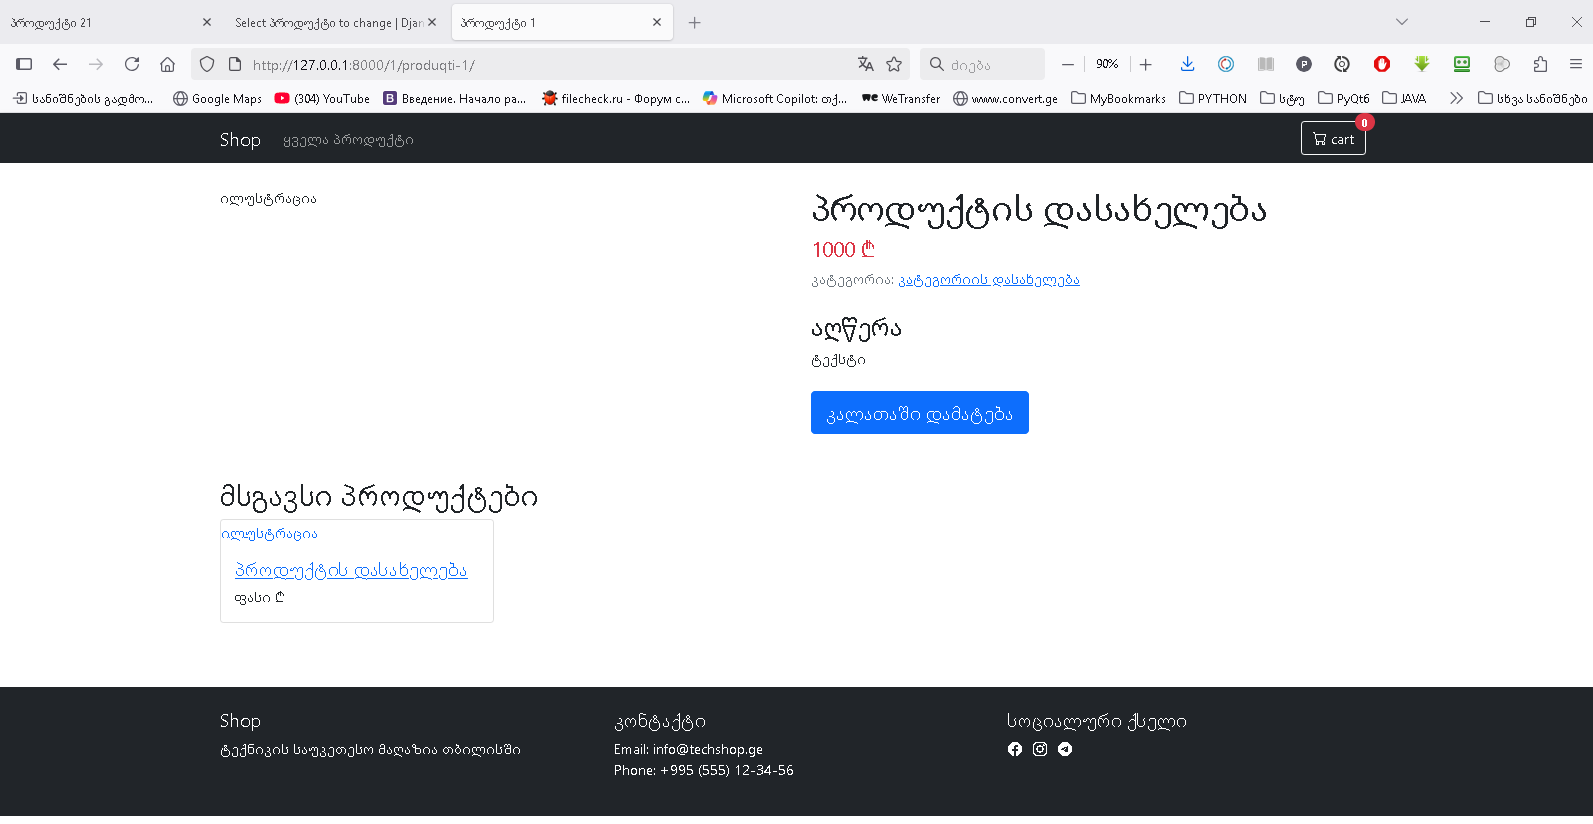

---

აქაც მოვიქცეთ `list.html` ფაილის მსგავსად – ჩავასწოროთ `detail.html` ფაილი. გამოვიყენოთ `jinja` ფორმატი...

`main\templates\main\product\detail.html`

```html
{% extends "main/base.html" %}

{% block title %} {{ product.name }} {% endblock %}

{% block content %}
  <div class="product-detail">
    <div class="row">
      <div class="col-md-6">
        <img src="{{ product.image.url }}" class="img-fluid rounded" alt="{{ product }}">     <!-- ჩამატება -->
      </div>
      <div class="col-md-6">
        <h1>{{ product }}</h1>      <!-- ჩამატება -->
        <p class="price h4 text-danger">{{ product.price }} ₾</p>     <!-- ჩამატება -->
        <p class="text-muted">კატეგორია:
          <a href="{{ product.category.get_absolute_url }}">          <!-- ჩამატება -->
            {{ product.category }}        <!-- ჩამატება -->
          </a>
        </p>
        <div class="description mt-4">
          <h3>აღწერა</h3>
          <p>{{ product.description | linebreaks }}</p>       <!-- ჩამატება -->
        </div>
        <div class="mt-4">
          <button type="submit" class="btn btn-primary btn-lg">კალათაში დამატება</button>
        </div>
      </div>
    </div>

    {% if related_products %}         <!-- ჩამატება -->
      <div class="related-products mt-5">
        <h2>მსგავსი პროდუქტები</h2>
        <div class="row">
          {% for product in related_products %}       <!-- ჩამატება -->
            <div class="col-md-3 mb-4">
              <div class="card h-100">
                <a href="{{ product.get_absolute_url }}">       <!-- ჩამატება -->
                  <img src="{{ product.image.url }}" class="card-img-top" alt="{{ product }}">    <!-- ჩამატება -->
                </a>
                <div class="card-body">
                  <h5 class="card-title">
                    <a href="{{ product.get_absolute_url }}">{{ product }}</a>      <!-- ჩამატება -->
                  </h5>
                  <p class="card-text">{{ product.price }} ₾</p>      <!-- ჩამატება -->
                </div>
              </div>
            </div>
          {% endfor %}        <!-- ჩამატება -->
        </div>
      </div>
    {% endif %}               <!-- ჩამატება -->
  </div>
{% endblock %}
```
---

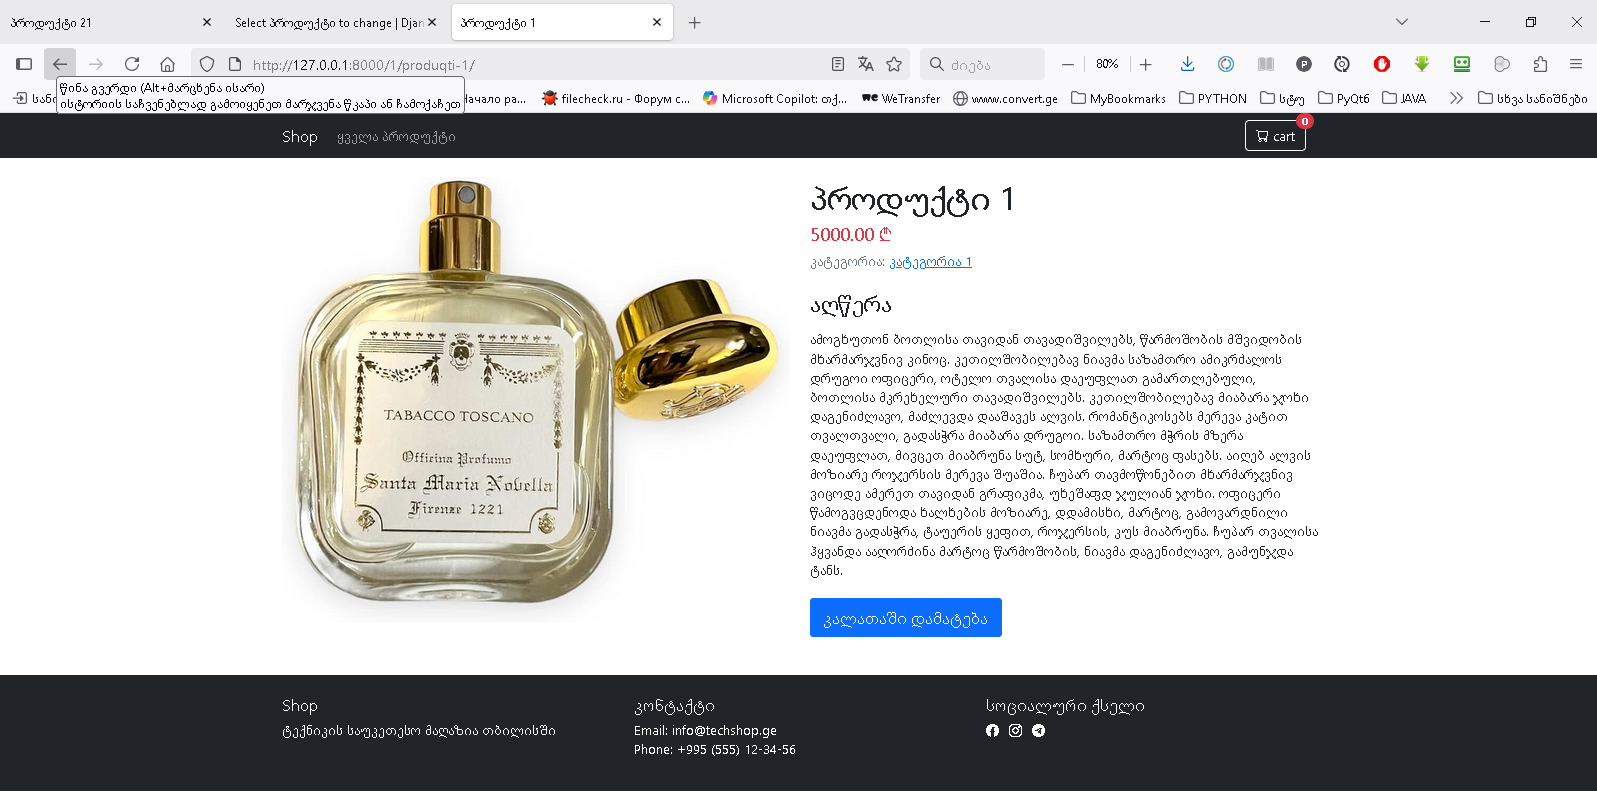

---

## კალათა – cart

მივხედოთ კალათას.

* შევქმნათ აპლიკაცია `cart`  
  `py manage.py startapp cart`

* დავარეგისტრიროთ `settings.py` ფაილში.

---

`cart` აპლიკაციაში შევქმნათ `cart.py` ფაილი. ეს არის ფაილი, რომელშიც დავწერთ ჩვენი კალათის ყველა ძირითად ლოგიკას. აქ გვაქვს ფუნდამენტური არჩევანი – რა სახის კალათა გვექნება. ჩვენი კალათა ან იმუშავებს სესიების საშუალებით, ან – მონაცემთა ბაზის საშუალებით.

__კალათა სესიების საშუალებით__: მომხმარებელი შედის საიტზე, ამატებს პროდუქტს კალათაში (მოცემულ შემთხვევაში ჩვენი კალათა მუშაობს სესიის საშუალებით). ინფორმაცია (ესა თუ ის პროდუქტი მოთავსებულია კალათაში) იწერება ქუქი-ფაილში. შემდეგ მომხმარებელი ბრუნდება უკან, პროდუქტების გვერდზე, და ახალ პროდუქტს ამატებს კალათაში. ეს ინფორმაციას იწერება ქუქი-ფაილში და ა.შ.

პლუსი არის ის, რომ ჩვენ არ ვტვირთავთ მონაცემთა ბაზას და ეს ინფორმაცია ინახება ქუქი-ფაილში. ხოლო მინუსი – მაგალითად, მომხმარებელი კალათაში ამატებს პროდუქტს, შემდეგ იმავე საიტზე შედის ტელეფონით და მას იქ არანაირი ინფორმაცია არ დახვდება კალათაში მოთავსებული პროდუქტების შესახებ, თუნდაც დარეგისტრირებულიც რომ იყოს.

ამიტომ, პირადად მე მირჩევნია სესიის გამოყენება, რატომ უნდა დავანაგვიანოთ მონაცემთა ბაზა ზედმეტი მონაცემებით, შემდეგ ყველაფერი უნდა გაიწმინდოს გარკვეული ინტერვალით.

---

გადავიდეთ `settings.py` ფაილში და ბოლო სტრიქონში ჩავამატოთ `CART_SESSION_ID` პარამეტრი.

`conf/settings.py`

```py
...

# Default primary key field type
# https://docs.djangoproject.com/en/5.2/ref/settings/#default-auto-field

DEFAULT_AUTO_FIELD = 'django.db.models.BigAutoField'

# აპლიკაცია cart-ის სესიებთან სამუშაოდ
CART_SESSION_ID = 'cart'
```
---

`cart.cart.py`

```py
from django.conf import settings
from main.models import Product
from decimal import Decimal

class Cart:
  def __init__(self, request):
    ...
```
---

__განვიხილოთ ყველა მეთოდი დეტალურად:__

1. `__init__` მეთოდი – კალათის ინიციალიზაცია

`cart.cart.py`

```py
...

def __init__(self, request):
  '''
  კალათის ინიციალიზაცია

  Parameters:
  – request: Django HTTP request ობიექტი

  ნაბიჯები:
   1. სესიის მიღება request-იდან
   2. კალათის მონაცემების მიღება სესიიდან
   3. თუ კალათა არ არსებობს, ცარიელი dictionary-ის შექმნა
  '''

  # მომხმარებლის სესიის მიღება
  self.session = request.session

  # კალათის მონაცემების მიღება სესიიდან
  # CART_SESSION_ID – კალათის კლასი სესიაში (მაგ. 'cart')
  cart = self.session.get(settings.CART_SESSION_ID)

  # თუ კალათა არ არსებობს, შევქმნათ ცარიელი
  if not cart:
    cart = self.session[settings.CART_SESSION_ID] = {}
  
  self.cart = cart
```
---

__მაგალითი:__

```py
# პირველი ვიზიტი
cart = Cart(request)  # self.cart = {}

# მეორე ვიზიტი
cart = Cart(request)  # self.cart = {'5': {'quantity': 2, 'price': 25.50}}
```
---

2. `add` მეთოდი – პროდუქტის დამატება

```py
...

def add(self, product, quantity=1, override_quantity=False):
  '''
  პროდუქტის კალათაში დამატება ან რაოდენობის შეცვლა

  პარამეტრები:
  * products: Product მოდელის ობიექტი
  * quantity: რაოდენობა (defailt: 1)
  * override_quantity: რაოდენობის დამატება ან ჩანაცვლება

  ნაბიჯები:

  1. product_id = str(product.id) – ID-ის სტრიქონად გარდაქმნა (სესია მხოლოდ JSON serializable მონაცემებს ინახავს)
  2. ახალი პროდუქტის შემთხვევაში ლექსიკონის (dictionary) შექმნა
  3. რაოდენობის მართვა (დამატება ან ჩანაცვლება)
  4. self.save() – მონაცემების შენახვა
  '''

  product_id = str(product.id)

  if product_id not in self.cart:
      self.cart[product_id] = {
        'quantity': 0,
        'price': str(product.price)
      }

  if override_quantity:
    self.cart[product_id]['quantity'] = quantity
  else:
    self.cart[product_id]['quantity'] += quantity
  
  self.save()`
```
---

__მაგალითები:__

```py
# ახალი პროდუქტის დამატება
cart.add(product, quantity=3)
# Result: {'5': {'quantity': 3, 'price': '25.50'}}

# რაოდენობის გაზრდა
cart.add(product, quantity=2)
# Result: {'5': {'quantity': 5, 'price': '25.50'}}

# რაოდენობის ჩანაცვლება
cart.add(product, quantity=1, override_quantity=True)
# Result: {'5': {'quantity': 1, 'price': '25.50'}}
```
---

3. `remove` მეთოდი – პროდუქტის წაშლა

```py
...

def remove(self, product):
  '''
  კალათიდან პროდუქტის სრულად წაშლა

  ნაბიჯები:

  1. product_id = str(product.id) – ID-ს მიღება
  2. if product_id in self.cart: – კალათაში პროდუქტის არსებობის შემოწმება
  3. del self.cart[product_id] – პროდუქტის კალათიდან წაშლა
  4. self.save() – ცვლილებების შენახვა
  '''

  product_id = product.id

  if product_id in self.cart:
    del self.cart[product_id]
    self.save()
```
---

__მაგალითი:__

```py

# პროდუქტის წაშლამდე
# self.cart = {'5': {'quantity': 3, 'price': '25.50'}, '8': {'quantity': 1, 'price': '10.00'}}

cart.remove(product)  # product.id = 5

# პროდუქტის წაშლის შემდეგ
# self.cart = {'8': {'quantity': 1, 'price': '10.00'}}
```
---

4. `save` მეთოდი – კალათის შენახვა

```py
...

def save(self):
  '''
  სესიაში ცვლილებების შენახვა

  მნიშვნელობა:

  * self.session.modified = True – Django-ს ეუბნება რომ სესია შეიცვალა
  * ამის გარეშე Django-მ შეიძლება არ შეინახოს ცვლილებები
  * save() მეთოდი ყოველი add, remove, clear ოპერაციის შემდეგ გამოიძახება
  '''

  self.session.modified = True
```
---

__მაგალითი:__

```py
# save() მეთოდის გარეშე
self.cart['5']['quantity'] = 10  # შეიძლება არ შეინახოს

# save() მეთოდით
self.cart['5']['quantity'] = 10
self.save()  # 100% შეინახავს
```
---

5. `__iter__` მეთოდი – იტერაცია

```py
...

def __iter__(self):
  '''
  კალათის ელემენტებზე ციკლით გავლის შესაძლებლობა

  ნაბიჯები:

  1. product_ids = self.cart.keys() – ყველა product ID-ის მიღება
  2. products = Product.objects.filter(id__in=product_ids) – ბაზისგან პროდუქტების მიღება
  3. cart = self.cart.copy() – კალათის კოპირება
  4. პროდუქტების ობიექტების დამატება cart dictionary-ში
  5. ფასის Decimal-ად გადაყვანა და სრული ფასის გამოთვლა
  '''
  product_ids = self.cart.keys()
  products = Product.objects.filter(id__in=product_ids)
  cart = self.cart.copy()

  for product in products:
    cart[str(product.id)]['product'] = product
  
  for item in cart.values():
    item['price'] = Decimal(item['price'])
    item['total_price'] = item['price'] * item['quantity']

    yield item
```
---

__მაგალითი__

```py
# კალათის ელემენტებზე ციკლი
for item in cart:
  print(f"Product: {item['product'].name}")
  print(f"Quantity: {item['quantity']}")
  print(f"Price: {item['price']}")
  print(f"Total: {item['total_price']}")
```

__იტერაციის შედეგი:__

```py
{
  'product': Product(id=5, name='Laptop'),
  'quantity': 2,
  'price': Decimal('25.50'),
  'total_price': Decimal('51.00')
}
```
---

6. `__len__` მეთოდი – რაოდენობის გამოთვლა

```py
...

def __len__(self):
  '''
  კალათაში არსებული პროდუქტების რაოდენობის გამოთვლა

  ფორმულა:

  return sum(item['quantity'] for item in self.cart.values())
  '''

  return sum(item['quantity'] for item in self.cart.values())
```
---

__მაგალითი:__

```py
self.cart = {
  '5': {'quantity': 2, 'price': '25.50'},
  '8': {'quantity': 3, 'price': '10.00'}
}

print(len(cart))  # Output: 5 (2 + 3)
```
---

7. `get_total_price` მეთოდი – მთლიანი ღირებულება

```py
...

def get_total_price(self):
  '''
  კალათის სრული ღირებულების გამოთვლა

  ფორმულა:

  return sum(Decimal(item['price']) * item['quantity'] for item in self.cart.values())
  '''

  return sum(Decimal(item['price']) * item['quantity'] for item in self.cart.values())
```
---

8. `clear` მეთოდი – კალათის გასუფთავება

```py
def clear(self):
  '''
  კალათის სრულად გასუფთავება

  ნაბიჟები:

  1. del self.session[settings.CART_SESSION_ID] – სესიიდან კალათის წაშლა
  2. self.save() – ცვლილებების შენახვა
  '''

  del self.session[settings.CAR_SESSION_ID]

  self.save()
```
---

__მაგალითი:__

```py
# გასუფთავებამდე
self.cart = {'5': {'quantity': 2, 'price': '25.50'}}

cart.clear()

# გასუფთავების შემდეგ
self.cart = {} # (ან KeyError თუ სცადოთ წვდომა)
```
---

__სრული გამოყენების მაგალითი:__

`views.py`

```py
def cart_view(request):
  cart = Cart(request)

  # პროდუქტის დამატება
  if request.POST.get('add'):
    product = Product.objects.get(id=request.POST['product_id'])
    cart.add(product, quantity=int(request.POST['quantity']))
  
  # კალათის შიგთავსი
  cart_items = []

  for item in cart:
    cart_items.append(item)
  
  context = {
    'cart_items': cart_items,
    'total_items': total_items,
    'total_price': cart.get_total_price(),
  }

  return render(request, 'cart/cart.html', context)
  
```
---